In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
# Read data from csv file

df = pd.read_csv("C:\\Users\\91982\\Desktop\\Projects\\LIFE EXPECTANCY PREDICTION FOR POST THORACIC SURGERY - AI\\thoracic+surgery+data\\Thoracic_surgery_survival_prediction\\Data Preprocessing\\thoracic_surgery.csv")

In [4]:
X = df.drop(['Death_In_1yr', 'MI_6mo', 'Asthma'], axis=1)
y = df['Death_In_1yr']

In [5]:
y.value_counts()

Death_In_1yr
0    385
1     69
Name: count, dtype: int64

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)



def dl_model(X_train, X_test, Y_train, Y_test):
    model = Sequential()
    model.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    
    # model summary
    model.summary()

    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])

    hist = model.fit(X_train, Y_train,epochs=100,
                     validation_data=(X_test, Y_test))
    
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot loss and validation loss on the first subplot
    ax1.plot(hist.history['loss'], label='Training Loss')
    ax1.plot(hist.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Number of Iterations')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot accuracy and validation accuracy on the second subplot
    ax2.plot(hist.history['accuracy'], label='Training Accuracy')
    ax2.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_xlabel('Number of Iterations')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    return model



c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.2312 - loss: 1.4143 - val_accuracy: 0.8175 - val_loss: 0.4765
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8495 - loss: 0.4525 - val_accuracy: 0.8394 - val_loss: 0.4624
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8345 - loss: 0.4750 - val_accuracy: 0.8467 - val_loss: 0.4706
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8389 - loss: 0.4773 - val_accuracy: 0.8467 - val_loss: 0.4650
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8333 - loss: 0.4722 - val_accuracy: 0.8394 - val_loss: 0.4578
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8441 - loss: 0.4461 - val_accuracy: 0.8394 - val_loss: 0.4523
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8737 - loss: 0.3868 - val_accuracy: 0.8394 - val_loss: 0.4505
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8401 - loss: 0.4468 - val_accuracy: 0.8394 -

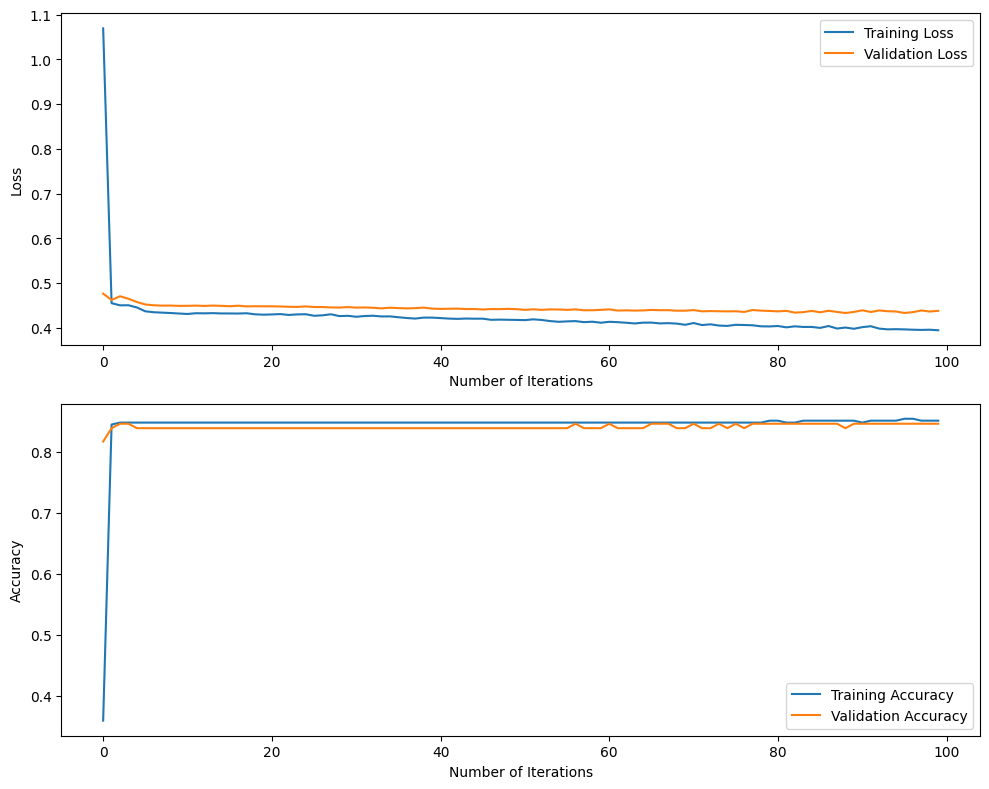

In [7]:
model = dl_model(X_train, X_test, Y_train, Y_test)

In [7]:
model.evaluate(X_test, Y_test)

y_pred = model.predict(X_test)
y_pred = y_pred.round().flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.4793 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [8]:
print("classification report : \n", classification_report(Y_test, y_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       116
           1       0.00      0.00      0.00        21

    accuracy                           0.85       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.85      0.78       137



c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Udersampling

In [9]:
from sklearn.utils import resample

In [10]:
# Separate majority and minority classes
maj_class = df[df['Death_In_1yr'] == 0]
min_class = df[df['Death_In_1yr'] == 1]

In [11]:
# Downsample majority class
maj_downsampled = resample(maj_class,  replace=False,n_samples=len(min_class),random_state=7)  # reproducible results

In [12]:
df_downsampled = pd.concat([maj_downsampled, min_class])

X = df_downsampled.drop(['Death_In_1yr', 'MI_6mo', 'Asthma'], axis=1)
y = df_downsampled['Death_In_1yr']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.5156 - loss: 1.3584 - val_accuracy: 0.5000 - val_loss: 0.9031
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5000 - loss: 0.8515 - val_accuracy: 0.5476 - val_loss: 0.6793
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5026 - loss: 0.7077 - val_accuracy: 0.5000 - val_loss: 0.7909
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5078 - loss: 0.8241 - val_accuracy: 0.5000 - val_loss: 0.8112
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5234 - loss: 0.7958 - val_accuracy: 0.5000 - val_loss: 0.7268
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5234 - loss: 0.7056 - val_accuracy: 0.6429 - val_loss: 0.6761
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5078 - loss: 0.6973 - val_accuracy: 0.5000 - val_loss: 0.7008
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5130 - loss: 0.7227 - val_accuracy: 0.5000 - val_loss

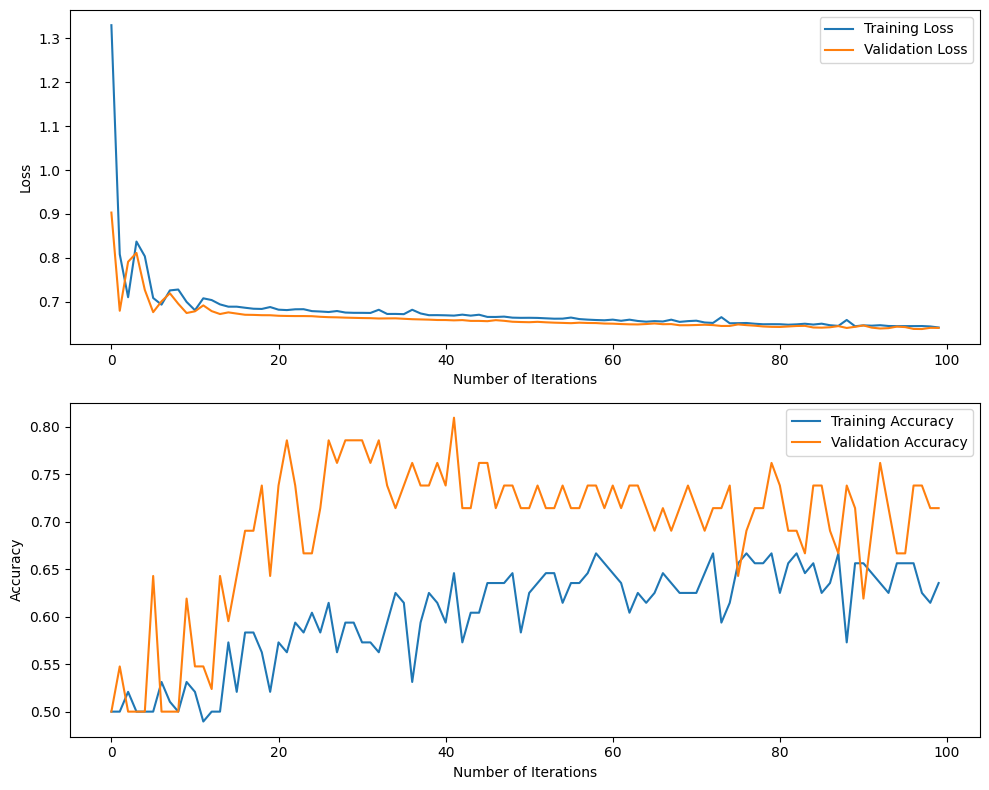

In [14]:
model = dl_model(X_train, X_test, Y_train, Y_test)


In [15]:
model.evaluate(X_test, Y_test)

y_pred = model.predict(X_test)
y_pred = y_pred.round().flatten()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.7366 - loss: 0.6265
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [16]:
print("classification report : \n", classification_report(Y_test, y_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.68      0.81      0.74        21
           1       0.76      0.62      0.68        21

    accuracy                           0.71        42
   macro avg       0.72      0.71      0.71        42
weighted avg       0.72      0.71      0.71        42



In [17]:
model.save('my_model_undersampling.keras')

Oversampaling


In [18]:
from imblearn.over_sampling import RandomOverSampler


X = df.drop(['Death_In_1yr', 'MI_6mo', 'Asthma'], axis=1)
y = df['Death_In_1yr']

# Apply oversampling
oversampler = RandomOverSampler(random_state=42)
X_res, y_res = oversampler.fit_resample(X, y)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=7, stratify=y_res)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4943 - loss: 11.0499 - val_accuracy: 0.4978 - val_loss: 4.0228
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5165 - loss: 2.1477 - val_accuracy: 0.5022 - val_loss: 1.0312
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4613 - loss: 1.0000 - val_accuracy: 0.4848 - val_loss: 0.7876
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4873 - loss: 0.7494 - val_accuracy: 0.4719 - val_loss: 0.7166
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4164 - loss: 0.7474 - val_accuracy: 0.3983 - val_loss: 0.7123
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4354 - loss: 0.7271 - val_accuracy: 0.4935 - val_loss: 0.7321
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4303 - loss: 0.7320 - val_accuracy: 0.4372 - val_loss: 0.7058
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4537 - loss: 0.7138 - val_accuracy: 0.4978 -

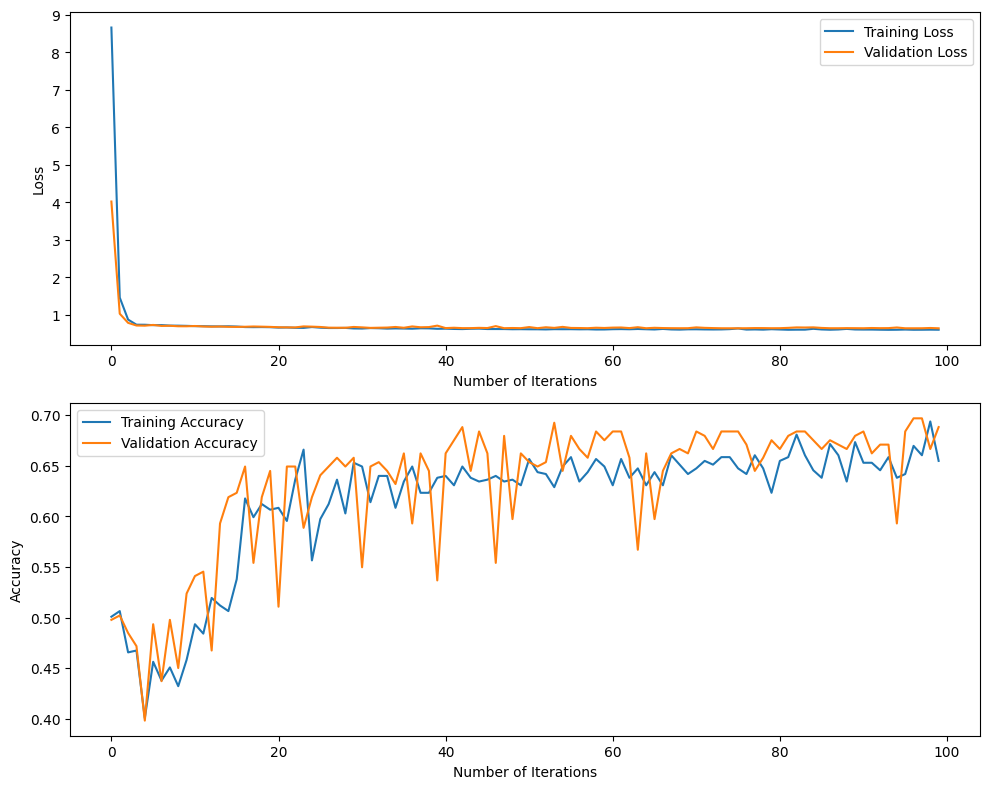

In [20]:
model = dl_model(X_train, X_test, Y_train, Y_test)


In [21]:
model.evaluate(X_test, Y_test)

y_pred = model.predict(X_test)
y_pred = y_pred.round().flatten()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - loss: 0.6427 
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001EBEFE82B60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [22]:
print("classification report : \n", classification_report(Y_test, y_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.73      0.59      0.65       115
           1       0.66      0.78      0.72       116

    accuracy                           0.69       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.70      0.69      0.69       231



In [23]:
model.save('my_model_rand_ovr_Samp.keras')

In [24]:
# SMOTE over sampling

from imblearn.over_sampling import SMOTE

X = df.drop(['Death_In_1yr', 'MI_6mo', 'Asthma'], axis=1)
y = df['Death_In_1yr']


In [25]:
# Apply SMOTE
smote = SMOTE(random_state=44)
X_res, y_res = smote.fit_resample(X, y)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=7, stratify=y_res)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5029 - loss: 1.3866 - val_accuracy: 0.4978 - val_loss: 0.7884
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5187 - loss: 0.7308 - val_accuracy: 0.5195 - val_loss: 0.7072
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5472 - loss: 0.6960 - val_accuracy: 0.5714 - val_loss: 0.6909
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5730 - loss: 0.6865 - val_accuracy: 0.5238 - val_loss: 0.6879
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5577 - loss: 0.6882 - val_accuracy: 0.5455 - val_loss: 0.6937
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5339 - loss: 0.6949 - val_accuracy: 0.4892 - val_loss: 0.6874
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4696 - loss: 0.7072 - val_accuracy: 0.5455 - val_loss: 0.6861
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5410 - loss: 0.6844 - val_accuracy: 0.5671 - 

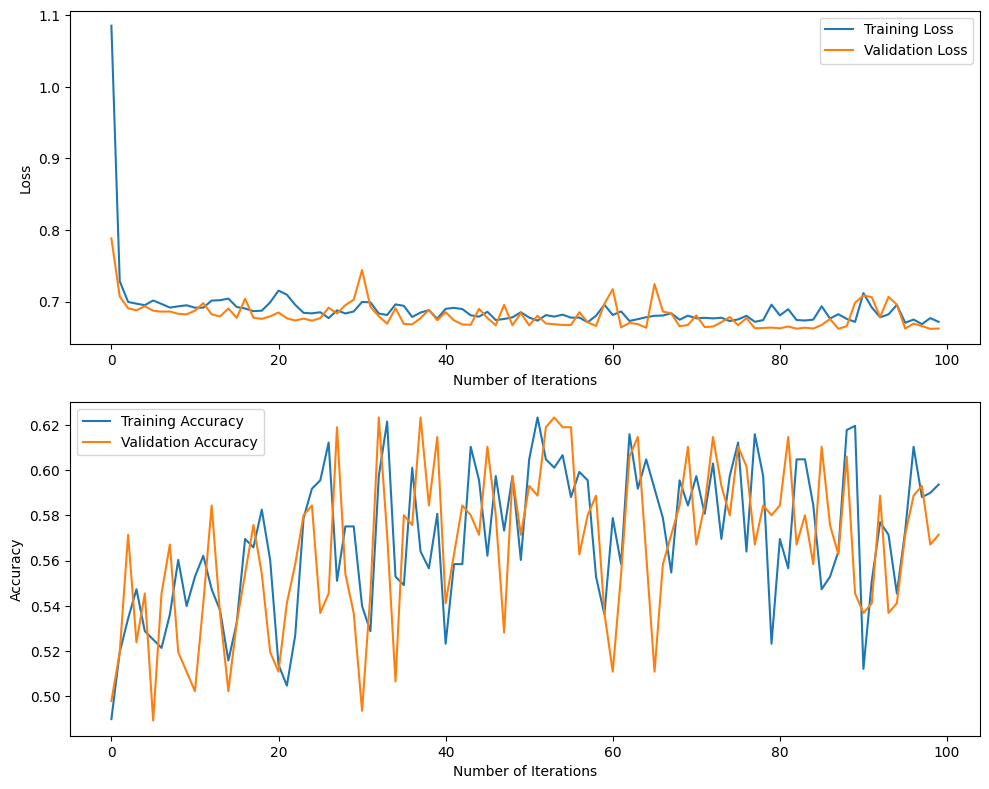

In [27]:
model = dl_model(X_train, X_test, Y_train, Y_test)

In [28]:
model.evaluate(X_test, Y_test)

y_pred = model.predict(X_test)
y_pred = y_pred.round().flatten()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5894 - loss: 0.6574 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [29]:
print("classification report : \n", classification_report(Y_test, y_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.60      0.42      0.49       115
           1       0.56      0.72      0.63       116

    accuracy                           0.57       231
   macro avg       0.58      0.57      0.56       231
weighted avg       0.58      0.57      0.56       231

